## K-means

v1.0

In [39]:
# 初始化
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 获取当前运行的python代码地址
import os
path = os.getcwd()
# path

In [40]:
# 数据读取
import pandas as pd
data = pd.read_csv('data.txt',sep='\n',header=None,names=['coordination_source'])
# data

# 数据预处理
import re
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
city_name=[]
city_gps=[]
for i in data['coordination_source']:
    city_info = pattern.findall(str(i))
    city, long, lat = city_info[0]
    city_name.append(city)
    city_gps.append((float(long),float(lat)))
city_info = {'name':city_name,'gps': city_gps}
# city_info


In [41]:
# 定义距离计算公式，采用Haversine距离
import math
def Haversine_Distance(pointA, pointB):
    #地球半径约为
    radius = 6371  # km
    lon1, lat1 = pointA
    lon2, lat2 = pointB
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return abs(d)

In [42]:
import random
def get_random_center(city_gps,k):
    '''
    随机生成K个聚类簇中心点
    :param k:
    :param city_gps:
    :return: cluster_point,cluster
    '''
    cluster=[]
    cluster_point=[]
    city_long = list(zip(*city_gps))[0]
    city_lat = list(zip(*city_gps))[1]
    for i in range(k):
        cp_x1 = random.uniform(min(city_long), max(city_long))
        cp_x2 = random.uniform(min(city_lat), max(city_lat))
        cluster_point.append((cp_x1,cp_x2))
        cluster.append([])
    return cluster_point, cluster

def train_iter_clustering(city_gps,cluster_point,cluster,k):
    '''
    将样本点分簇
    :param cluster_point:
    :param cluster:
    :param k:
    :return: cluster
    '''
    for j in range(len(city_gps)):
        distance=[]
        for i in range(k):
            distance.append(Haversine_Distance(city_gps[j],cluster_point[i]))
        cluster_index = distance.index(min(distance))
        cluster[cluster_index].append(city_gps[j])
    return cluster

import numpy as np
def cluster_point_update(city_gps,cluster_point,cluster,k):
    '''
    重新计算簇中心点
    :param cluster:
    :param k:
    :return: cluster_point
    '''
    for i in range(k):
        cluster_point[i] = tuple(np.mean(cluster[i], axis=0))
    return cluster_point

In [ ]:
def Kmeans_Function(train_iter, k, num_epochs, stop_d):
    '''
    k均值聚类
    :param train_iter:
    :param k:
    :param num_epochs:
    :param stop_d:
    :return:
    '''
    city_gps = train_iter['gps']
    cluster_point=[]
    cluster=[]
    # 随机初始化 K 个簇中心点
    clp, cl = get_random_center(city_gps, k)
    # 记录
    cluster_point.append(clp)
    cluster.append(cl)
    for i in range(num_epochs):
        # 将样本点分簇
        cl = train_iter_clustering(city_gps,clp,cl,k)
        cluster.append(cl)
        # 重新计算簇中心点
        clp = cluster_point_update(city_gps,clp,cl,k)
        cluster_point.append(clp)
        #
        isstop=[]
        for j in range(k):
            isstop.append(Haversine_Distance(cluster_point[i][j],cluster_point[i+1][j]))
        if max(isstop) <= stop_d: return cluster_point[i+1]
    return cluster_point[i+1]

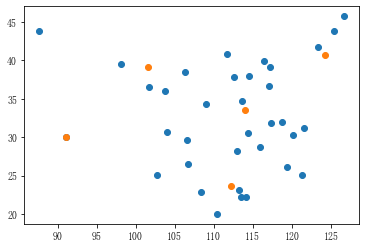

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

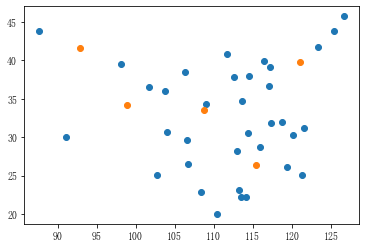

In [54]:
centers = Kmeans_Function(city_info,5,10,5)
plt.scatter(*zip(*city_info['gps']))
plt.scatter(*zip(*centers))

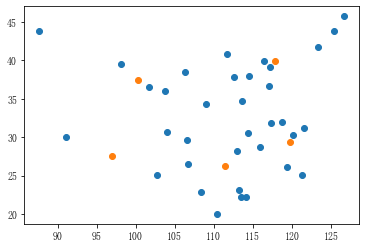

In [55]:
centers = Kmeans_Function(city_info,5,100,5)
plt.scatter(*zip(*city_info['gps']))
plt.scatter(*zip(*centers))

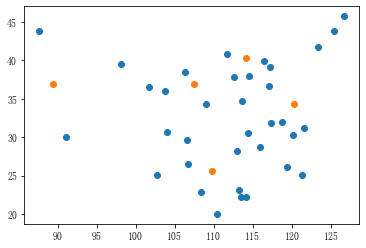

In [69]:
centers = Kmeans_Function(city_info,5,1000,5)
plt.scatter(*zip(*city_info['gps']))
plt.scatter(*zip(*centers))

